In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.express as px
from windrose import WindroseAxes
from datetime import datetime, timedelta

In [7]:
df = pd.read_csv('../data/sierraleone-bumbuna.csv')

In [9]:
print("Column names in the DataFrame:")
print(df.columns.tolist())

Column names in the DataFrame:
['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation', 'TModA', 'TModB', 'Comments']


In [11]:
start_time = datetime(2025, 5, 20, 9, 53, 0)
df['Timestamp'] = [start_time + timedelta(minutes=i) for i in range(len(df))]


In [15]:
numeric_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust', 'WDstdev', 'WD', 'BP', 'Precipitation', 'TModA', 'TModB']
print("\nSummary Statistics:")
print(df[numeric_cols].describe())


Summary Statistics:
                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      201.957515     116.376337     113.720571     206.643095   
std       298.495150     218.652659     158.946032     300.896893   
min       -19.500000      -7.800000     -17.900000       0.000000   
25%        -2.800000      -0.300000      -3.800000       0.000000   
50%         0.300000      -0.100000      -0.100000       3.600000   
75%       362.400000     107.000000     224.700000     359.500000   
max      1499.000000     946.000000     892.000000    1507.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      198.114691      26.319394      79.448857       1.146113   
std       288.889073       4.398605      20.520775       1.239248   
min         0.000000      12.300000       9.900000       0.000000   
25%         

In [17]:
print("\nMissing Values:")
missing = df.isna().sum()
print(missing)
print("\nColumns with >5% missing values:")
missing_percent = (missing / len(df)) * 100
print(missing_percent[missing_percent > 5])


Missing Values:
Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

Columns with >5% missing values:
Comments    100.0
dtype: float64


In [19]:
z_scores = df[['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']].apply(lambda x: np.abs(stats.zscore(x)))
outliers = (z_scores > 3).any(axis=1)
print("\nNumber of rows with outliers (|Z| > 3):", outliers.sum())


Number of rows with outliers (|Z| > 3): 16292


In [21]:
key_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
for col in key_cols:
    if df[col].isna().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)

In [23]:
df.to_csv('../data/sierraleone_clean.csv', index=False)


C:\Users\Administrator\AppData\Local\Temp\ipykernel_10184\3986069225.py:11: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig('time_series.png')
C:\Users\Administrator\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


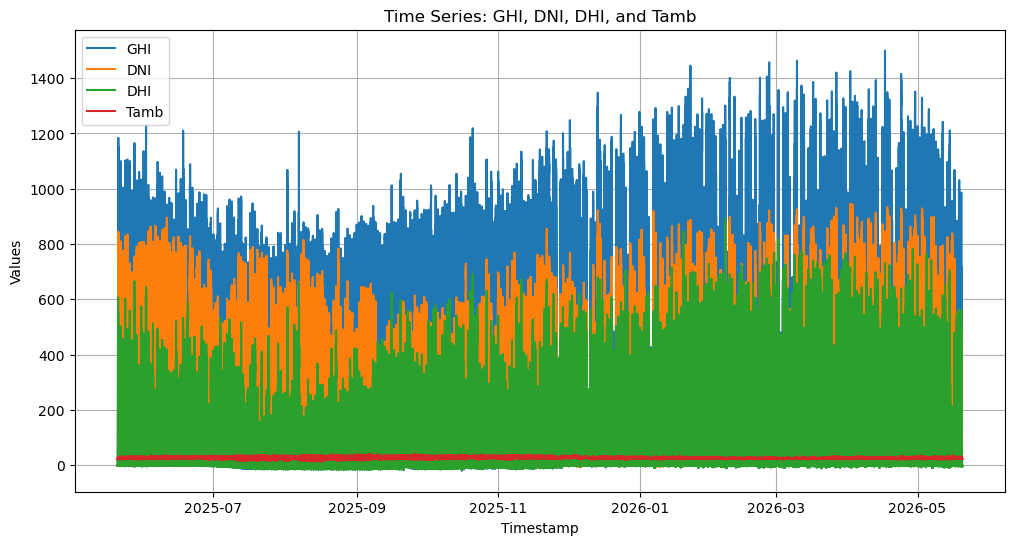

In [25]:
plt.figure(figsize=(12, 6))
plt.plot(df['Timestamp'], df['GHI'], label='GHI')
plt.plot(df['Timestamp'], df['DNI'], label='DNI')
plt.plot(df['Timestamp'], df['DHI'], label='DHI')
plt.plot(df['Timestamp'], df['Tamb'], label='Tamb')
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.title('Time Series: GHI, DNI, DHI, and Tamb')
plt.legend()
plt.grid(True)
plt.savefig('time_series.png')

In [27]:
cleaning_impact = df.groupby('Cleaning')[['ModA', 'ModB']].mean()
print("\nAverage ModA and ModB by Cleaning Flag:")
print(cleaning_impact)


Average ModA and ModB by Cleaning Flag:
                ModA        ModB
Cleaning                        
0         206.578599  198.038150
1         273.309252  277.231102


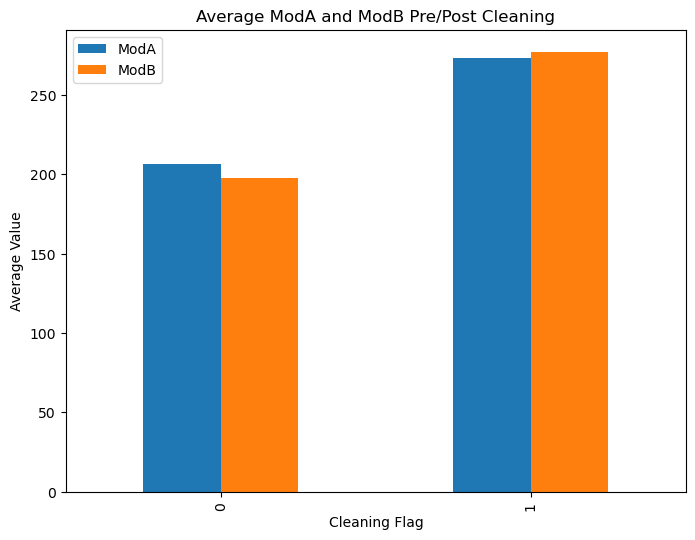

In [29]:
cleaning_impact.plot(kind='bar', figsize=(8, 6))
plt.title('Average ModA and ModB Pre/Post Cleaning')
plt.xlabel('Cleaning Flag')
plt.ylabel('Average Value')
plt.savefig('cleaning_impact.png')

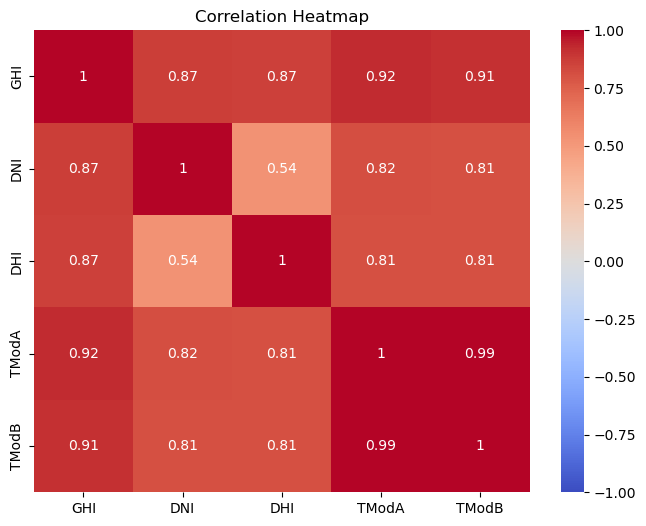

In [31]:
corr_cols = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
corr_matrix = df[corr_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.savefig('correlation_heatmap.png')

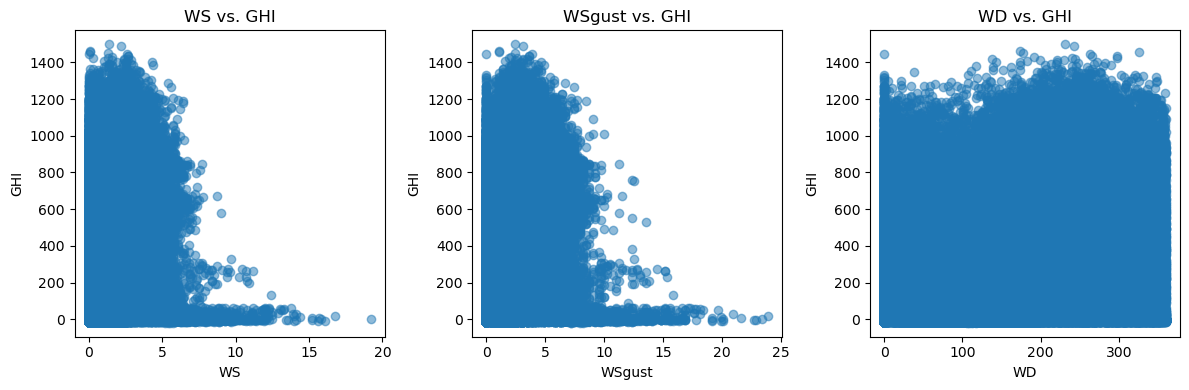

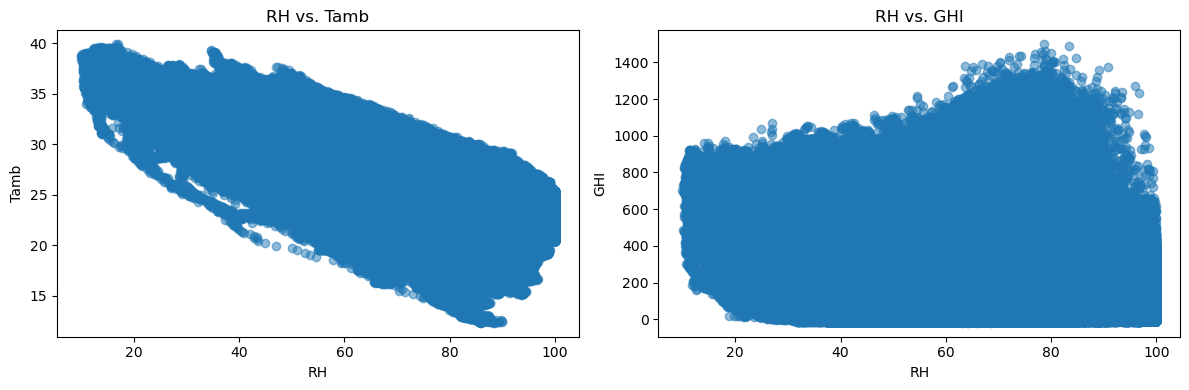

In [33]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.scatter(df['WS'], df['GHI'], alpha=0.5)
plt.xlabel('WS')
plt.ylabel('GHI')
plt.title('WS vs. GHI')

plt.subplot(1, 3, 2)
plt.scatter(df['WSgust'], df['GHI'], alpha=0.5)
plt.xlabel('WSgust')
plt.ylabel('GHI')
plt.title('WSgust vs. GHI')

plt.subplot(1, 3, 3)
plt.scatter(df['WD'], df['GHI'], alpha=0.5)
plt.xlabel('WD')
plt.ylabel('GHI')
plt.title('WD vs. GHI')
plt.tight_layout()
plt.savefig('scatter_ws_ghi.png')

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.scatter(df['RH'], df['Tamb'], alpha=0.5)
plt.xlabel('RH')
plt.ylabel('Tamb')
plt.title('RH vs. Tamb')

plt.subplot(1, 2, 2)
plt.scatter(df['RH'], df['GHI'], alpha=0.5)
plt.xlabel('RH')
plt.ylabel('GHI')
plt.title('RH vs. GHI')
plt.tight_layout()
plt.savefig('scatter_rh.png')

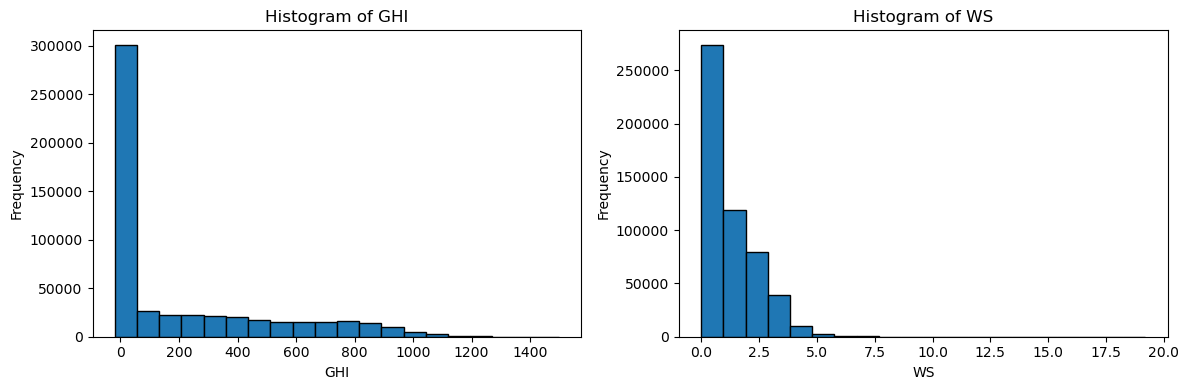

In [35]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(df['GHI'], bins=20, edgecolor='black')
plt.xlabel('GHI')
plt.ylabel('Frequency')
plt.title('Histogram of GHI')

plt.subplot(1, 2, 2)
plt.hist(df['WS'], bins=20, edgecolor='black')
plt.xlabel('WS')
plt.ylabel('Frequency')
plt.title('Histogram of WS')
plt.tight_layout()
plt.savefig('histograms.png')

In [ ]:
fig = px.scatter(df, x='Tamb', y='GHI', size='RH', hover_data=['Timestamp'],
                 title='Bubble Chart: GHI vs. Tamb (Bubble Size = RH)')
fig.write_image('bubble_chart.png')